# **Parkinson's Disease (PD) Detection Using Hand-Drawn Images**
***

## **1 Project**

- **Motivation**: In recent years, the prevalence of Parkinson's Disease (PD) has increased, highlighting the need for early and accurate detection. Hand-drawn patterns, are commonly used in clinical assessments to evaluate motor impairments associated with PD. By analyzing these images, we aim to leverage deep learning to develop an automated, non-invasive tool that complements clinical practices.

 - **Problem**: Parkinson's Disease, a progressive neurodegenerative disorder, significantly impacts motor skills, making early detection vital for managing symptoms and improving quality of life. Can human judgment reliably detect subtle patterns in hand-drawn images? Could deep learning models provide an accurate and efficient solution for this binary classification task, distinguishing images as PD or non-PD?

 - **Approaches**:
    - **Deep Learning**: Utilize CNN-based models, including MobileNetV2, VGG16, and DenseNet121, for feature extraction and image classification.

    - **Traditional Models**: Apply SVM, KNN, and Random Forest as baseline comparisons to evaluate the performance of deep learning models.

***
## **2 Data**

- **Acquisition**: The dataset, "Parkinson's Disease Augmented Data of Handdrawings", is sourced from Kaggle. The data originates from the original dataset created by K Scott Mader, which contained 204 images. Through augmentation processes, including rotations (90°, 180°, 270°), vertical flipping (180°), and conversion to color images, 204 original images was increased to 3264 images (Anil Kumar, 2023).

- **Description**: 

  - **Folder**: `Dataset`
  - **Subfolders**:
    - `Healthy`: 1,632 images
    - `Parkinson`: 1,632 images<br><br>
    
  - **Total Images**: 3,264

  - **Content**: Hand-drawn **spirals** and **waves**.
  
  <br>**Reference**<br><br>
   Anil Kumar, B. (2023). *Parkinson's Disease Augmented Data of Handdrawings* [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/banilkumar20phd7071/handwritten-parkinsons-disease-augmented-data/data.

***

### **Import Libraries**

In [1]:
import os
import random
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

### **Load Data**

- Read image file paths from dataset folders.
  
- Assign corresponding labels: `0` for "Healthy", `1` for "Parkinson".

- Store image paths and labels in arrays.

In [2]:
# Define dataset path
dataset_path = '/kaggle/input/handwritten-parkinsons-disease-augmented-data/Dataset/Dataset'
output_dir = '/kaggle/working/preprocessed_dataset'

In [3]:
# Define categories and assign labels
classes = {'Healthy': 0, 'Parkinson': 1}

# Collect all image file paths and corresponding labels
image_paths = []
labels = []

for cls, label in classes.items():
    cls_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(cls_path):
        image_paths.append(os.path.join(cls_path, img_name))
        labels.append(label)

# Convert to NumPy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Total images loaded: {len(image_paths)}")

Total images loaded: 3264


***
## **3 EDA**

### **Step 1: Data Splitting (Train/Test)**

- **80%** for training and **20%** for testing using `train_test_split`.

- **Stratified split** ensures a balanced ratio (Healthy vs. Parkinson) in both training and testing datasets.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split dataset into training (80%) and testing (20%)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.20, random_state=SEED, stratify=labels
)

print(f"Total images: {len(image_paths)} (Training: {len(train_paths)}, Testing: {len(test_paths)})")

Total images: 3264 (Training: 2611, Testing: 653)


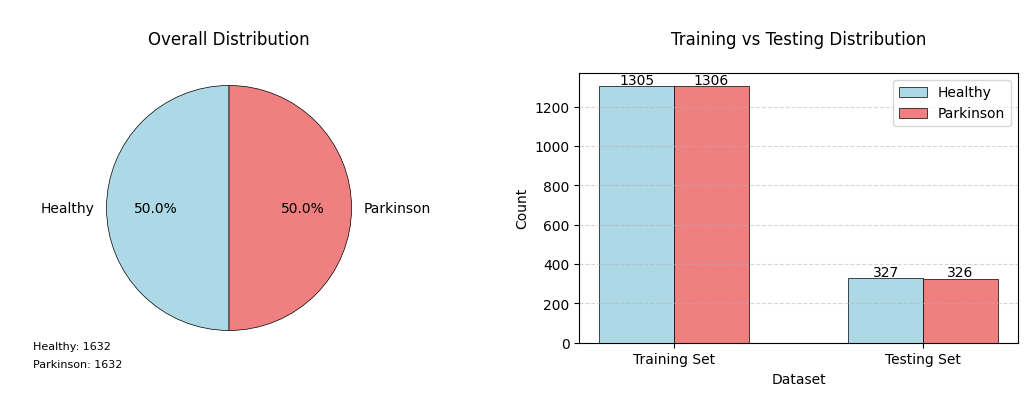

In [6]:
# Visualization of label distribution
fig, axes = plt.subplots(1, 2, figsize=(13, 3.5), gridspec_kw={'wspace': 0.3})

# Define class labels
pie_labels = ['Healthy', 'Parkinson']

# Count occurrences of each label in the entire dataset
unique_labels, counts_labels = np.unique(labels, return_counts=True)

# Define colors
new_colors = ['lightblue', 'lightcoral']
edge_color = 'black'

# Prepare text annotations for Healthy and Parkinson counts
healthy_count = counts_labels[0]
parkinson_count = counts_labels[1]

# Plot pie chart for the entire dataset
wedges, texts, autotexts = axes[0].pie(
    counts_labels, labels=pie_labels, autopct='%1.1f%%', startangle=90, 
    colors=new_colors, wedgeprops={'edgecolor': edge_color, 'linewidth': 0.5}
)
axes[0].set_title('\nOverall Distribution\n')
axes[0].axis('equal')

# Annotate counts on pie chart
axes[0].text(-1.6, -1.15, f'Healthy: {healthy_count}', fontsize=8, color='black')
axes[0].text(-1.6, -1.3, f'Parkinson: {parkinson_count}', fontsize=8, color='black')

# Count occurrences in training and testing sets
train_healthy, train_parkinson = np.bincount(train_labels)
test_healthy, test_parkinson = np.bincount(test_labels)

# Plot bar chart for training and testing sets
bar_width = 0.3
x_positions = np.arange(len(['Training Set', 'Testing Set']))

bars_healthy = axes[1].bar(x_positions - bar_width / 2, [train_healthy, test_healthy], width=bar_width, 
                           label='Healthy', color=new_colors[0], edgecolor=edge_color, linewidth=0.5)
bars_parkinson = axes[1].bar(x_positions + bar_width / 2, [train_parkinson, test_parkinson], width=bar_width, 
                             label='Parkinson', color=new_colors[1], edgecolor=edge_color, linewidth=0.5)

# Annotate counts on bar chart
for bar in bars_healthy:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(int(bar.get_height())), ha='center', fontsize=10)

for bar in bars_parkinson:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(int(bar.get_height())), ha='center', fontsize=10)

axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Count')
axes[1].set_title('\nTraining vs Testing Distribution\n')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(['Training Set', 'Testing Set'])
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].legend()

plt.tight_layout()
# plt.savefig('label_distribution.png', dpi=300)
plt.show()

The label distribution is perfectly balanced!

***
### **Step 2: Data Cleaning**

- **Check for Missing Data**: Ensure that the image file exists and is accessible to avoid processing missing or unavailable files.
  
- **Check Data Integrity**: Detect and remove corrupted images that cannot be loaded to maintain data quality.
  
- **Check for Extreme Values**: Convert images to grayscale and analyze brightness levels to identify blank or overexposed images.

In [7]:
# Function to clean the dataset
def clean_image_data(image_paths):
    cleaned_paths = []
    for img_path in image_paths:
        # Check foe missing data
        if not os.path.exists(img_path):
            print(f"Missing file: {img_path}")
            continue

        image = cv2.imread(img_path)

        # Check data integrity
        if image is None:
            print(f"Corrupted image: {img_path}")
            continue
        
        # Check for extreme values
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if np.mean(gray_image) < 10 or np.mean(gray_image) > 245:
            print(f"Potential noisy image: {img_path}")
            continue

        # Save cleaned image to a new directory
        cleaned_paths.append(img_path)

    return cleaned_paths

# Print the count before cleaning
print(f"Before cleaning - Total images: 3264")

# Apply the cleaning process to the dataset
train_paths = clean_image_data(train_paths)
test_paths = clean_image_data(test_paths)

# Print the final count after cleaning
print(f"After cleaning - Total images: {len(train_paths) + len(test_paths)}")

Before cleaning - Total images: 3264
After cleaning - Total images: 3264


The data cleaning process did not remove any images, showing that all images were valid and met the quality criteria perfectly!

***
### **Step 3: Data Preprocessing**

#### 1. **Image Preprocessing and Visualizations**:

- **Resize** all images to a fixed size of `256x256` pixels for consistency.
  
- Convert them into **numerical arrays** using `img_to_array`.
  
- Save them in `train/` and `test/` directories with subfolders for each class (`0` for Healthy and `1` for Parkinson).

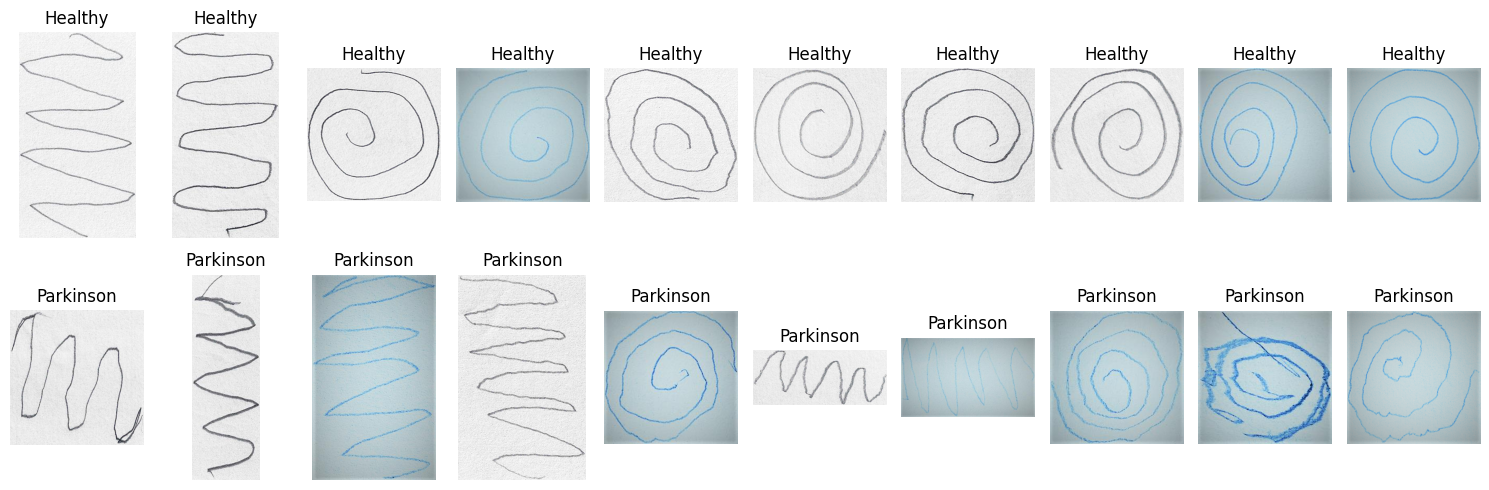

In [8]:
# Display some sample images
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

# Get indices for each class
healthy_indices = np.where(labels == 0)[0][:10]
parkinson_indices = np.where(labels == 1)[0][:10]

for idx, img_idx in enumerate(healthy_indices):
    img_path = image_paths[img_idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[0, idx].imshow(img)
    axes[0, idx].set_title("Healthy")
    axes[0, idx].axis('off')

for idx, img_idx in enumerate(parkinson_indices):
    img_path = image_paths[img_idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes[1, idx].imshow(img)
    axes[1, idx].set_title("Parkinson")
    axes[1, idx].axis('off')

plt.tight_layout()
# plt.savefig('images.png', dpi=300)
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array

In [10]:
# Create output directories
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    os.makedirs(os.path.join(output_dir, 'train'))
    os.makedirs(os.path.join(output_dir, 'test'))

# Resizing and Saving
def preprocess_and_save(image_paths, labels, split_name):
    """Resize images, convert to arrays, and save to new directories."""
    target_size = (256, 256)
    for img_path, label in zip(image_paths, labels):
        image = cv2.imread(img_path)
        if image is not None:
            # Resize and convert image to array
            resized_image = cv2.resize(image, target_size)
            img_array = img_to_array(resized_image)

            # Define save path based on label
            class_dir = os.path.join(output_dir, split_name, str(label))
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)

            # Save processed image
            img_name = os.path.basename(img_path)
            save_path = os.path.join(class_dir, img_name)
            cv2.imwrite(save_path, resized_image)

# Preprocess and save training and testing data
preprocess_and_save(train_paths, train_labels, 'train')
preprocess_and_save(test_paths, test_labels, 'test')

print("Data preprocessing completed. Resized images saved in train/test directories.")

Data preprocessing completed. Resized images saved in train/test directories.


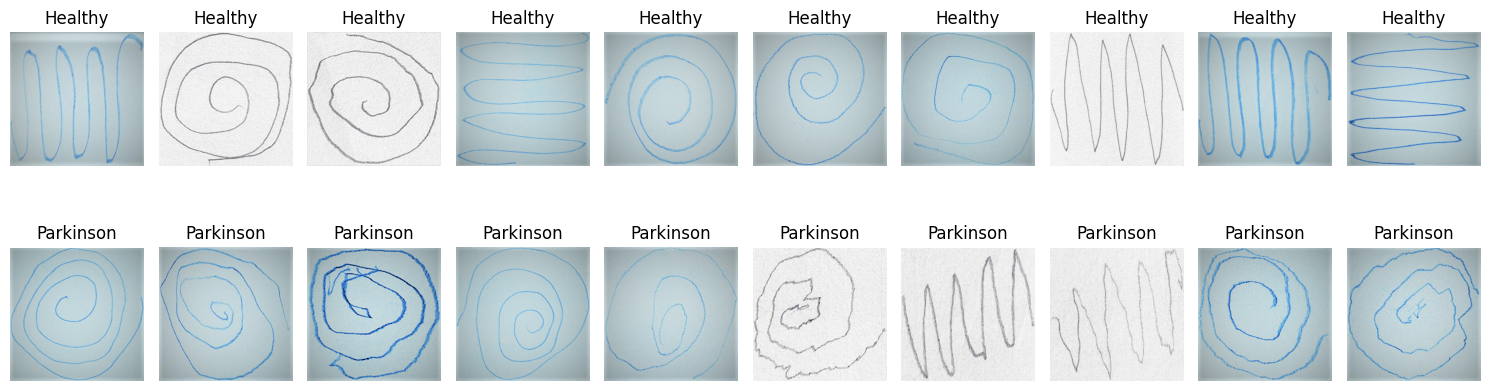

In [11]:
# Define paths to preprocessed dataset
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Get processed Healthy and Parkinson images from the train set
healthy_images = [os.path.join(train_dir, '0', img) for img in os.listdir(os.path.join(train_dir, '0'))[:10]]
parkinson_images = [os.path.join(train_dir, '1', img) for img in os.listdir(os.path.join(train_dir, '1'))[:10]]

# Combine images and set titles
selected_images = healthy_images + parkinson_images
titles = ['Healthy'] * 10 + ['Parkinson'] * 10

# Display some processed images
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

for idx, img_path in enumerate(selected_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = 0 if idx < 10 else 1
    col = idx % 10
    axes[row, col].imshow(image)
    axes[row, col].set_title(titles[idx])
    axes[row, col].axis('off')

plt.tight_layout()
# plt.savefig('processed_images.png', dpi=300)
plt.show()

All images have been resized to a consistent size. Well done!

***
- **Edge Detection**:
  
  - **Healthy**: The edges in the healthy samples appear smoother and more consistent, with well-defined and continuous lines forming clear patterns such as spirals and waves.
    
  - **Parkinson**: The edges in the Parkinson samples show irregularities, distortions, and jaggedness. There are noticeable tremors and inconsistencies in the drawn patterns, indicating potential motor control difficulties.
 
  - **Conclusion**: The edge detection results suggest that there are observable structural differences between healthy and Parkinson images, which could be useful features for classification purposes.

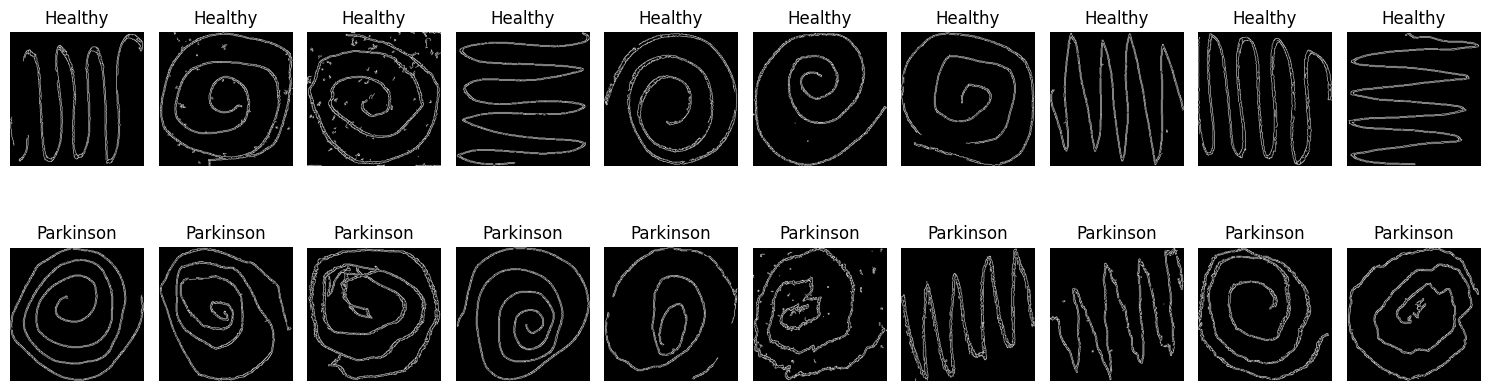

In [12]:
def edge_detection(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)
    return edges

fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for idx, img_path in enumerate(selected_images):
    edges = edge_detection(img_path)
    row = 0 if idx < 10 else 1
    col = idx % 10
    axes[row, col].imshow(edges, cmap='gray')
    axes[row, col].set_title(titles[idx])
    axes[row, col].axis('off')

plt.tight_layout()
# plt.savefig('edge_images.png', dpi=300)
plt.show()

***
- **Pixel Intensity Distribution**:
  
  - **Healthy**: Sharp peak near **250**, indicating brighter pixels; minor peak around **150-200**.

  - **Parkinson**: Similar trend but with a broader intensity range, especially in **150-200**.
 
  - **Conclusion**: Parkinson images show more pixel variation, likely due to motor impairments affecting pen pressure and consistency.

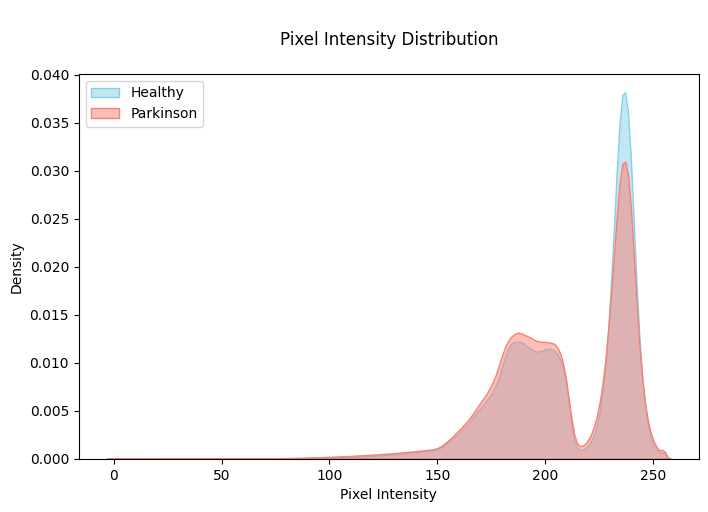

In [13]:
# Initialize lists to store pixel values
healthy_pixels = []
parkinson_pixels = []

# Read all images from test set
healthy_dir = os.path.join(test_dir, '0')
parkinson_dir = os.path.join(test_dir, '1')

# Process Healthy images
for img_name in os.listdir(healthy_dir):
    img_path = os.path.join(healthy_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    healthy_pixels.extend(img.ravel())  # Flatten and accumulate pixel values

# Process Parkinson images
for img_name in os.listdir(parkinson_dir):
    img_path = os.path.join(parkinson_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    parkinson_pixels.extend(img.ravel())  # Flatten and accumulate pixel values

# Plot KDEs
plt.figure(figsize=(8, 5))

# Plot Healthy pixels
sns.kdeplot(healthy_pixels, color='skyblue', fill=True, alpha=0.5, label='Healthy')

# Plot Parkinson pixels
sns.kdeplot(parkinson_pixels, color='salmon', fill=True, alpha=0.5, label='Parkinson')

plt.title('\nPixel Intensity Distribution\n')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.savefig('pixel_distribution.png', dpi=300)
plt.show()

***
#### 2. **Image Preparation (for Deep Learning)**:

- **Data Normalization**:
  - Apply pixel value scaling to the range [0,1] using `rescale=1./255` to normalize image data.<br><br>
  
- **Load Training data**:
  - Resize images to `224x224` pixels to match input requirements for pretrained models
  - Use a batch size of `16` for efficient processing.
  - Set `class_mode='binary'` to handle two classes (0: Healthy, 1: Parkinson).<br><br>
    
- **Load Testing data**:
  - Load images from the testing directory with the same preprocessing steps as training.
  - Ensure consistent target size and batch size for evaluation purposes.
  - Keep image ordering consistent by setting `shuffle=False`.

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
# Data normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # Adjusted for pretrained models
    batch_size=16,
    class_mode='binary',  # Binarized labels (0 and 1)
    shuffle=True,  # Shuffle training data
    seed=SEED
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False,  # Keep evaluation order consistent
    seed=SEED
) 

# Check class indices
print("Class indices:", train_generator.class_indices)

Found 2611 images belonging to 2 classes.
Found 653 images belonging to 2 classes.
Class indices: {'0': 0, '1': 1}


***
#### 3. **Feature Extraction (for Traditional Models)**:

- **Image Preprocessing**:
  - Load and resize images to `224x224` to match the VGG16 input size.
  - Convert images to numerical arrays using `image.img_to_array()`.
  - Using `preprocess_input()` to normalize pixel values.<br><br>
    
- **Feature Extraction**:
  - Use the `VGG16` model to extract meaningful features from the images.
  - Flatten the extracted features into a 1D feature vector.<br><br>
    
- **Labeling**: Assign class labels (`0` for Healthy, `1` for Parkinson).
  
- **Storage**: Save extracted features and labels as NumPy arrays for ML models.

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
# Load pre-trained VGG16 model without the top layers (only feature extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(image_dir):
    features = []
    labels = []

    for label in ['0', '1']:  # 0: Healthy, 1: Parkinson
        class_dir = os.path.join(image_dir, label)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(np.expand_dims(img_array, axis=0))

            # Extract features from VGG16
            feature = base_model.predict(img_array).flatten()
            features.append(feature)
            labels.append(int(label))
            
    return np.array(features), np.array(labels)

# Extract features
X_train, y_train = extract_features(os.path.join(output_dir, 'train'))
X_test, y_test = extract_features(os.path.join(output_dir, 'test'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1

In [40]:
# Check the shape of the feature matrices
print("Feature shape:", X_train.shape, X_test.shape)

Feature shape: (2611, 25088) (653, 25088)


***
## **4 Models**

### **Step 1: Deep Learning**

#### **Overview**:

1. **CNN (Custom)**: A basic custom CNN is used to build a model from scratch, providing a foundational approach to extract features from hand-drawn images and classify them. This allows full control over the architecture and serves as a baseline to compare the performance of more advanced pre-trained models.

2. **MobileNetV2 (Transfer Learning)**: MobileNetV2 is a pre-trained model selected for its lightweight and efficient design. Using transfer learning, it can leverage features learned from large-scale datasets, such as ImageNet, to adapt to the Parkinson's disease dataset. This is particularly useful for scenarios with limited data, ensuring better performance with reduced training time and resources.

3. **VGG16 (Transfer Learning)**: VGG16 is chosen as a pre-trained model for its deep and consistent architecture, which has been widely validated in image classification tasks. Transfer learning enables the model to utilize its pre-learned feature representations, making it effective for detecting patterns in the hand-drawn images with minimal tuning.

4. **DenseNet121 (Transfer Learning)**: DenseNet121 is included for its dense connectivity, which promotes feature reuse and enhances gradient flow. As a pre-trained model, it leverages its robust feature extraction capabilities to identify subtle patterns in the dataset, making it a strong candidate for complex classification tasks.

***
#### 1. **CNN:**

- **Input Layer**: Accepts images of shape **(224, 224, 3)**.
  
- **Convolutional-Pooling Blocks**:

  - **Block 1**: `32` filters (3x3), `ReLU` activation, MaxPooling (2x2).
  - **Block 2**: `64` filters (3x3), `ReLU` activation, MaxPooling (2x2).
  - **Block 3**: `128` filters (3x3), `ReLU` activation, MaxPooling (2x2).<br><br>

- **Flatten Layer**: Converts 2D features to 1D.

- **Fully Connected Layers**:

  - `Dense` (`256` neurons, `ReLU` activation).
  - `Dropout` (`0.5` to prevent overfitting).<br><br>
    
- **Output Layer**: `Dense` (`1` neuron, `sigmoid` activation) for binary classification.

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [110]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,244,929 (84.86 MB)

 Trainable params: 22,244,929 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
import time
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.5166 - loss: 0.7416 - val_accuracy: 0.5161 - val_loss: 0.6864
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.5812 - loss: 0.6790 - val_accuracy: 0.7213 - val_loss: 0.5922
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7269 - loss: 0.5341 - val_accuracy: 0.7580 - val_loss: 0.5210
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8357 - loss: 0.3792 - val_accuracy: 0.8331 - val_loss: 0.3755
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9192 - loss: 0.2152 - val_accuracy: 0.8882 - val_loss: 0.3278
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9537 - loss: 0.1449 - val_accuracy: 0.9234 - val_loss: 0.2875
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9767 - loss: 0.0700 - val_accuracy: 0.9372 - val_loss: 0.3206
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9800 - loss: 0.0655 - 

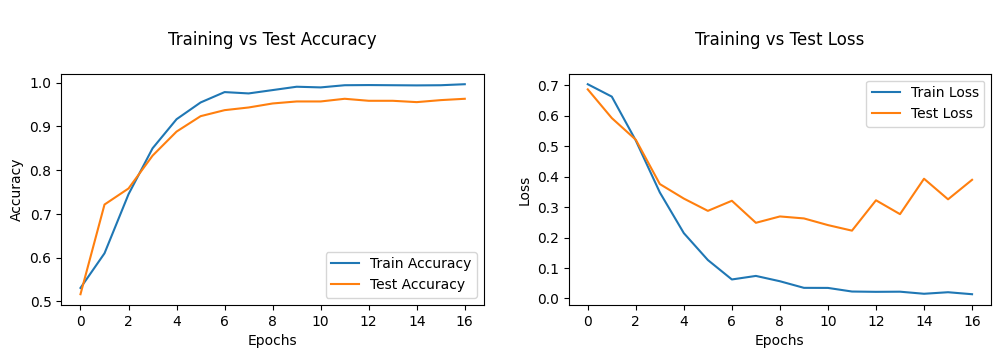

In [112]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start timer
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# End timer
end_time = time.time()

# Calculate training duration
training_time = end_time - start_time
minutes, seconds = divmod(training_time, 60)
print("-" * 120)
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 3))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('\nTraining vs Test Accuracy\n')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nTraining vs Test Loss\n')

plt.show()

In [113]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


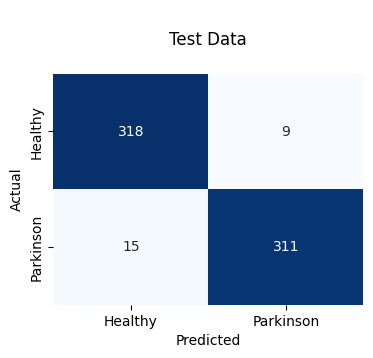

Accuracy: 0.96
F1 Score: 0.96
AUC Score: 0.98


In [114]:
# Predict the test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Parkinson'], 
            yticklabels=['Healthy', 'Parkinson'], 
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('\nTest Data\n')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC Score: {auc:.2f}')

***
#### 2. **MobileNetV2**:

- **Base Model**:

  - Uses `MobileNetV2` pre-trained on ImageNet as the feature extractor.
  - The top classification layers are excluded (`include_top=False`).
  - All layers are frozen to retain pre-trained weights (`base_model.trainable = False`).<br><br>
  
- **Custom Classification Head**:

  - `GlobalAveragePooling2D`: Reduces feature maps to a single value.
  - `Dense` (`256` neurons, `ReLU` activation).
  - `Dropout` (`0.5` to prevent overfitting).
  - `Dense` (`1` neuron, `sigmoid` activation)  for binary classification.

In [115]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [49]:
# Load MobileNetV2 as the base model (excluding the top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model
base_model.trainable = False

# Add new classification layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Build the complete model
mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
mobilenet_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.7379 - loss: 0.5367 - val_accuracy: 0.8606 - val_loss: 0.3143
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8490 - loss: 0.3196 - val_accuracy: 0.8913 - val_loss: 0.2602
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8870 - loss: 0.2423 - val_accuracy: 0.9234 - val_loss: 0.1957
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9064 - loss: 0.2116 - val_accuracy: 0.9219 - val_loss: 0.1774
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9165 - loss: 0.1871 - val_accuracy: 0.9357 - val_loss: 0.1549
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9307 - loss: 0.1614 - val_accuracy: 0.9433 - val_loss: 0.1417
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9406 - loss: 0.1377 - val_accuracy: 0.9495 - val_loss: 0.1241
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9639 - loss: 0.1048 - 

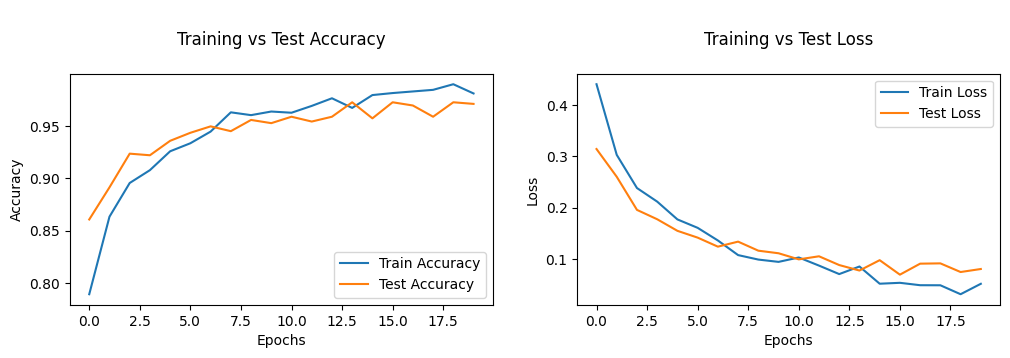

In [116]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start timer
start_time = time.time()

# Train the model
history = mobilenet_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# End timer
end_time = time.time()

# Calculate training duration
training_time = end_time - start_time
minutes, seconds = divmod(training_time, 60)
print("-" * 120)
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 3))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('\nTraining vs Test Accuracy\n')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nTraining vs Test Loss\n')

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


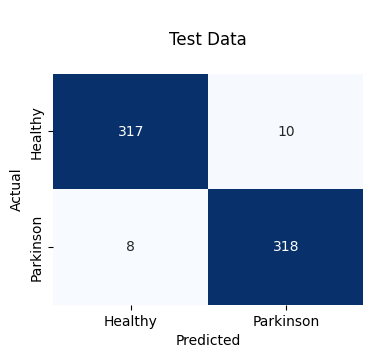

Accuracy: 0.97
F1 Score: 0.97
AUC Score: 1.00


In [126]:
# Predict the test set
y_pred_prob = mobilenet_model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Parkinson'], 
            yticklabels=['Healthy', 'Parkinson'], 
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('\nTest Data\n')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC Score: {auc:.2f}')

***
#### 3. **VGG16**:

- The architecture shares common elements with `MobileNetV2`, including **GlobalAveragePooling2D**, **Dropout (0.5)**, and a **Dense (Sigmoid)** output layer for binary classification.

- **Key Difference**: The fully connected layer uses **512 neurons** (vs. **256** in `MobileNetV2`) to accommodate VGG16's high-dimensional feature maps (e.g., 7x7x512), ensuring it captures the complex features effectively.

In [118]:
from tensorflow.keras.applications import VGG16

In [119]:
# Load VGG16 as the base model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the VGG16 pre-trained model
base_model.trainable = False

# Create custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Build the complete model
vgg_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
vgg_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,6

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.6762 - loss: 0.5997 - val_accuracy: 0.8484 - val_loss: 0.3751
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.8029 - loss: 0.4254 - val_accuracy: 0.8315 - val_loss: 0.3775
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.8215 - loss: 0.3965 - val_accuracy: 0.8560 - val_loss: 0.3371
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8357 - loss: 0.3695 - val_accuracy: 0.8729 - val_loss: 0.3030
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8602 - loss: 0.3338 - val_accuracy: 0.8744 - val_loss: 0.2837
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8609 - loss: 0.3176 - val_accuracy: 0.8821 - val_loss: 0.2862
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8528 - loss: 0.3287 - val_accuracy: 0.8836 - val_loss: 0.2617
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8630 - loss: 0.2953 - 

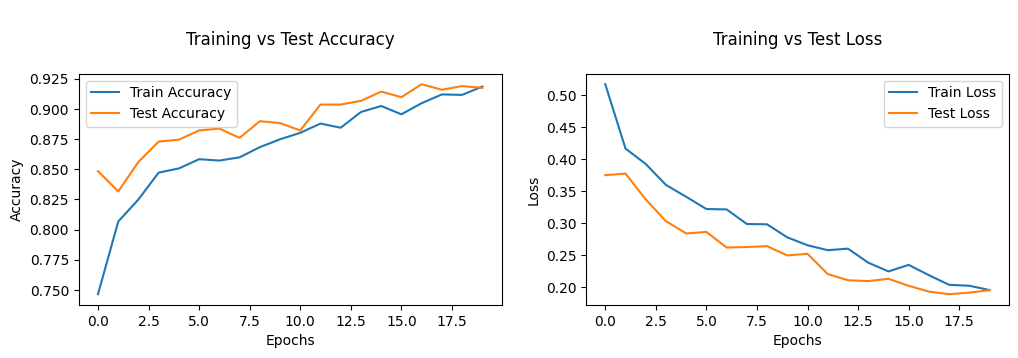

In [120]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start timer
start_time = time.time()

# Train the model
history = vgg_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# End timer
end_time = time.time()

# Calculate training duration
training_time = end_time - start_time
minutes, seconds = divmod(training_time, 60)
print("-" * 120)
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 3))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('\nTraining vs Test Accuracy\n')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nTraining vs Test Loss\n')

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


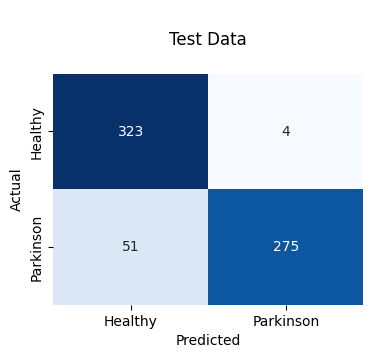

Accuracy: 0.92
F1 Score: 0.91
AUC Score: 0.98


In [121]:
# Predict the test set
y_pred_prob = vgg_model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Parkinson'], 
            yticklabels=['Healthy', 'Parkinson'], 
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('\nTest Data\n')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC Score: {auc:.2f}')

***
#### 4. **DenseNet121**:

- The architecture shares common elements with `MobileNetV2` and `VGG16`, including **GlobalAveragePooling2D**, **Dropout (0.5)**, and a **Dense (Sigmoid)** output layer for binary classification.

- **Key Difference**: `DenseNet121`’s densely connected layers promote feature reuse and efficient gradient flow, producing richer and more compact feature maps compared to `VGG16`’s independent layer design. The **512-neuron Dense layer** ensures these complex outputs are effectively utilized without bottlenecking.

In [122]:
from tensorflow.keras.applications import DenseNet121

In [123]:
# Load DenseNet121 as the base model (excluding the top classification layers)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the DenseNet121 pre-trained model
base_model.trainable = False

# Create custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Build the complete model
densenet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
densenet_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_9[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,562,817 (28.85 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 46s 165ms/step - accuracy: 0.7200 - loss: 0.5725 - val_accuracy: 0.8530 - val_loss: 0.3185
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8330 - loss: 0.3597 - val_accuracy: 0.8959 - val_loss: 0.2791
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8529 - loss: 0.3314 - val_accuracy: 0.8790 - val_loss: 0.2656
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8747 - loss: 0.2981 - val_accuracy: 0.8239 - val_loss: 0.3500
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8802 - loss: 0.2800 - val_accuracy: 0.9096 - val_loss: 0.2137
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8874 - loss: 0.2529 - val_accuracy: 0.9219 - val_loss: 0.1939
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9138 - loss: 0.2070 - val_accuracy: 0.9081 - val_loss: 0.2228
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9064 - loss: 0.2193 -

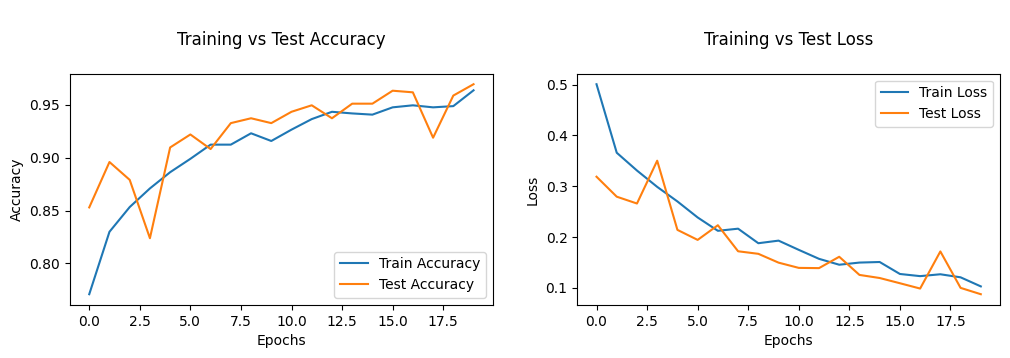

In [124]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start timer
start_time = time.time()

# Train the model
history = densenet_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# End timer
end_time = time.time()

# Calculate training duration
training_time = end_time - start_time
minutes, seconds = divmod(training_time, 60)
print("-" * 120)
print(f"Training completed in {int(minutes)} minutes and {int(seconds)} seconds.")

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 3))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('\nTraining vs Test Accuracy\n')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('\nTraining vs Test Loss\n')

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step


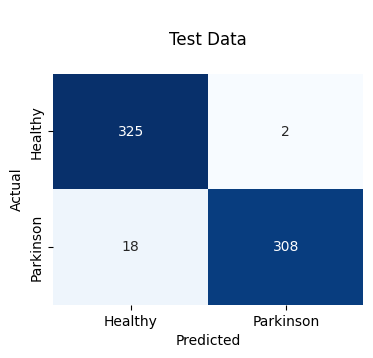

Accuracy: 0.97
F1 Score: 0.97
AUC Score: 1.00


In [125]:
# Predict the test set
y_pred_prob = densenet_model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Parkinson'], 
            yticklabels=['Healthy', 'Parkinson'], 
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('\nTest Data\n')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC Score: {auc:.2f}')

***
### **Step 2: Traditional Models**


1. **Support Vector Machine**: Uses the RBF kernel (`gamma='scale'`) with `C=1.0` to find the optimal hyperplane for separating classes, effective for non-linear decision boundaries.
   
2. **K-Nearest Neighbor**: Classifies samples based on the majority class of their 5 nearest neighbors (`n_neighbors=5`), using distance metrics for similarity.
   
3. **Random Forest**: An ensemble method with 100 decision trees (`n_estimators=100`) to improve classification accuracy and reduce overfitting through randomness.

In [38]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Define the models dictionary
models = {
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Loop through each model, train and evaluate
for name, model in models.items():
    print("-" * 25)
    print(f"Model: {name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:")
    print(conf_matrix)

-------------------------
Model: SVM
Accuracy: 0.92
Confusion Matrix:
[[317  10]
 [ 41 285]]
-------------------------
Model: KNN
Accuracy: 0.86
Confusion Matrix:
[[321   6]
 [ 84 242]]
-------------------------
Model: Random Forest
Accuracy: 0.88
Confusion Matrix:
[[313  14]
 [ 65 261]]


***
## **5 Results and Analysis**

#### 1. **Performance Comparison**: 

- **Best Performing Model: MobileNetV2**:
  
  - **MobileNetV2** had the best overall performance **(0.97)** with a balanced confusion matrix, showing **high sensitivity and specificity**.
  - **DenseNet121** also performed exceptionally well **(0.97)**, with slightly more misclassified samples compared to MobileNetV2.<br><br>
    
- **Performance Overview**:

  - **CNN** performed well **(0.96)**, slightly behind MobileNetV2 and DenseNet121.
  - **VGG16** had **lower accuracy (0.92)** due to more misclassified Parkinson cases.
  - **Traditional models (SVM, KNN, RF)** performed significantly worse, with **KNN** having the **lowest accuracy (0.86)**, suggesting that deep learning models are better suited for this task.<br><br>

- **Conclusion**: Deep learning models, especially **MobileNetV2** and **DenseNet121**, significantly outperformed traditional ML models, demonstrating their effectiveness in Parkinson’s disease detection using hand-drawn images.


| Model       | Accuracy | F1-Score | AUC Score| Confusion Matrix     |
|:-----------:|:--------:|:--------:|:--------:|:--------------------:|
| CNN         | 0.96     | 0.96     | 0.98     | [318 09]<br>[15 311] |
| MobileNet   | <span style="color:red">0.97</span>|<span style="color:red">0.97</span>|<span style="color:red">1.00</span>| [317 <span style="color:red">10</span>]<br>[<span style="color:red">08</span> 318] |
| VGG         | 0.92     | 0.91     | 0.98     | [323 04]<br>[51 275] |
| DenseNet    |<span style="color:blue">0.97</span>|<span style="color:blue">0.97</span>|<span style="color:blue">1.00</span>| [325 <span style="color:blue">02</span>]<br>[<span style="color:blue">18</span> 308] |
| SVM         | 0.92     | 0.92     | 0.92     | [317 10]<br>[41 285] |
| KNN         | 0.86     | 0.84     | 0.86     | [321 06]<br>[84 242] |
| RF          | 0.88     | 0.87     | 0.88     | [313 14]<br>[65 261] |

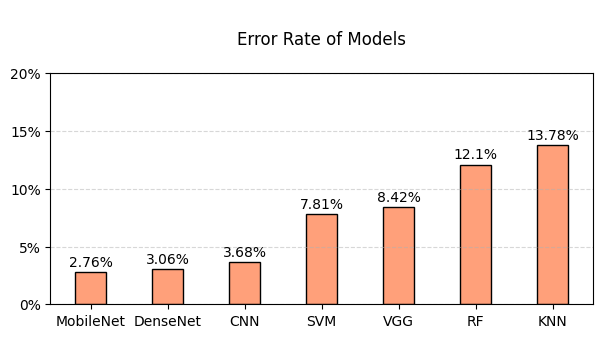

In [34]:
# Model names
models = ["CNN", "DenseNet", "MobileNet", "SVM", "VGG", "RF", "KNN"]

# Calculate error rates
total_samples = 653
error_samples = {"CNN": 24, "MobileNet": 18, "VGG": 55, "DenseNet": 20, "SVM": 51, "KNN": 90, "RF": 79}
error_rate = [round((error_samples[model] / total_samples) * 100, 2) for model in models]

# Sort models by error rates in ascending order
sorted_indices = np.argsort(error_rate)
models = [models[i] for i in sorted_indices]
error_rate = [error_rate[i] for i in sorted_indices]

# Plot bar chart
plt.figure(figsize=(7, 3))
plt.bar(models, error_rate, color='lightsalmon', edgecolor='black', width=0.4)
plt.title("\nError Rate of Models\n", fontsize=12)
plt.ylim(0, max(error_rate) + 5)  # Set y-axis range
plt.yticks(ticks=range(0, int(max(error_rate)) + 10, 5), labels=[f"{tick}%" for tick in range(0, int(max(error_rate)) + 10, 5)])

# Display values on each bar
for i, error in enumerate(error_rate):
    plt.text(i, error + 0.5, f"{error}%", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.savefig('error_rate.png', dpi=300)
plt.show()

***
#### 2. **Error Analysis**: 

- **Misclassified Images** (using `MobileNetV2` as a sample):
  
  - Based on the classification results, there are **18** misclassified samples:

    - **(True: 0, Pred: 1) - False Positives (FP)**: 10 samples (**5 spirals, 5 waves**)
    - **(True: 1, Pred: 0) - False Negatives (FN)**: 8 samples (**6 spirals, 2 waves**)<br><br>
  
  - This suggests that **spirals** tend to be more challenging for the model to classify correctly.
  
- **Possible Reasons for Misclassification**:

  - **False Positives (FP)**:
 
    - **Natural variations in handwriting styles**: Some healthy individuals may naturally have slower or less steady hand movements, creating drawings that resemble those of PD patients.
    - **Noise in the dataset**: Differences in image quality, pen pressure, lighting conditions, or stroke thickness could lead to misinterpretations by the model.
    - **Aging effects**: Elderly individuals without Parkinson’s may exhibit slight motor impairments, causing their drawings to resemble those of PD patients.<br><br>

  - **False Negatives (FN)**:
 
    - **Early-stage PD symptoms**: Patients in early stages of Parkinson’s may still retain relatively steady hand control, making their drawings appear normal.
    - **Compensatory effort**: Patients might actively try to draw more slowly and carefully, reducing tremor effects and making their drawings appear more like those of healthy individuals.
    - **Symptom variability**: Motor symptoms fluctuate, meaning that some PD patients may have better motor control on the day of testing, leading to less distinguishable patterns.

In [129]:
# Identify misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Separate them into two categories
misclassified_0_as_1 = [idx for idx in misclassified_indices if y_test[idx] == 0 and y_pred[idx] == 1]
misclassified_1_as_0 = [idx for idx in misclassified_indices if y_test[idx] == 1 and y_pred[idx] == 0]

# Print the results
print(f"Misclassified samples (True: 0, Pred: 1): {len(misclassified_0_as_1)}, Indices: {misclassified_0_as_1}")
print(f"Misclassified samples (True: 1, Pred: 0): {len(misclassified_1_as_0)}, Indices: {misclassified_1_as_0}")

Number of misclassified samples: 18
Misclassified samples (True: 0, Pred: 1): 10, Indices: [0, 32, 60, 83, 89, 194, 219, 247, 265, 282]
Misclassified samples (True: 1, Pred: 0): 8, Indices: [404, 522, 525, 559, 585, 598, 603, 605]


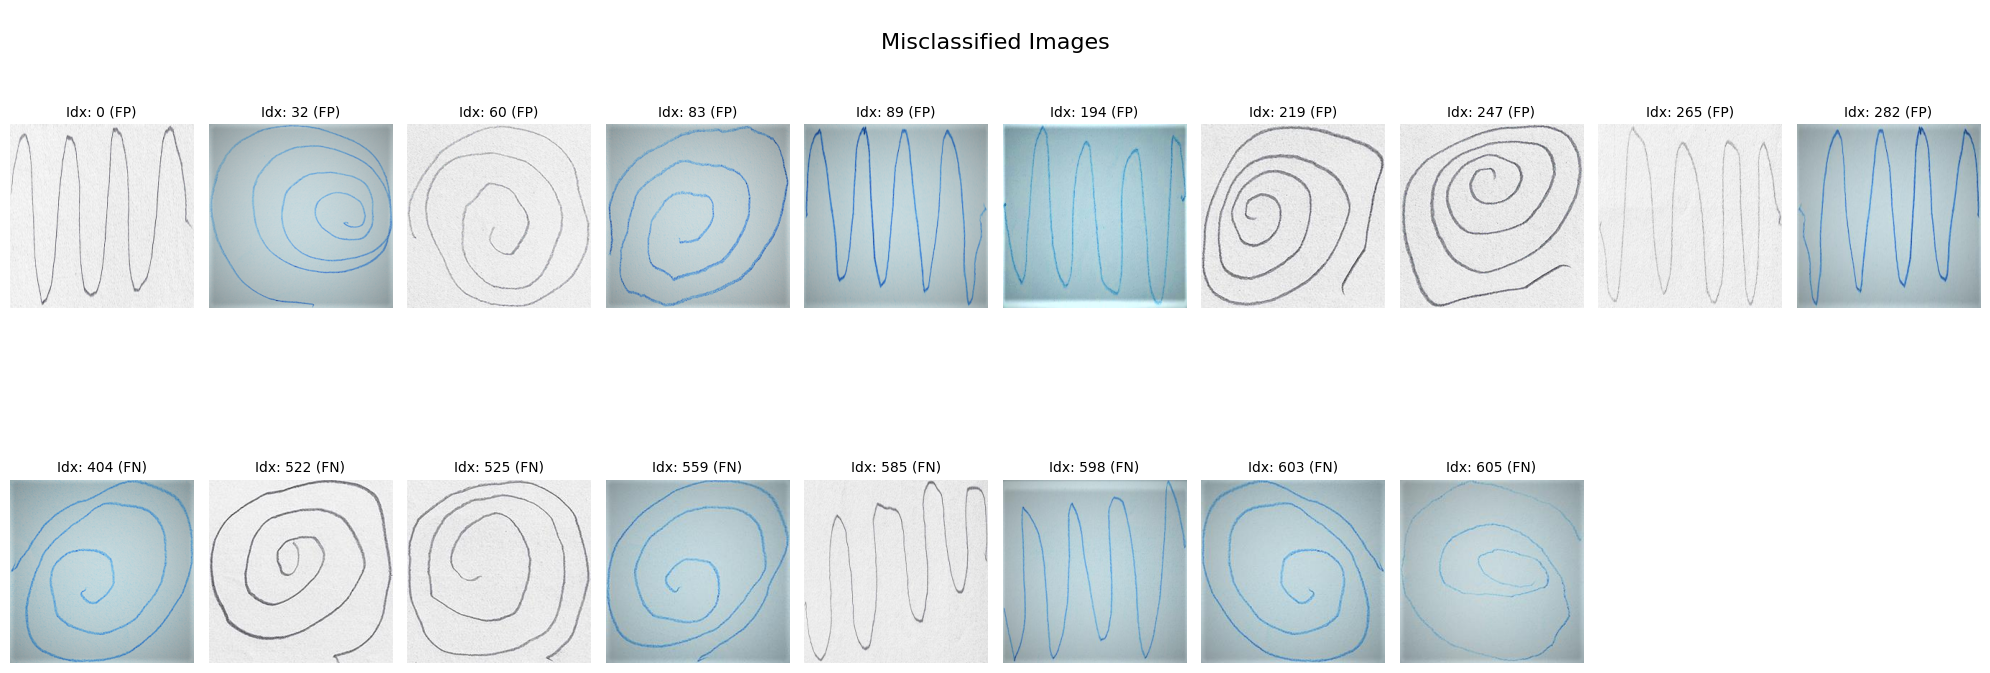

In [134]:
# Visualize misclassified images
def visualize_images_grid(misclassified_0_as_1, misclassified_1_as_0, test_images):
    num_cols_0_as_1 = 10  # Number of images in the first row
    num_cols_1_as_0 = 8   # Number of images in the second row

    plt.figure(figsize=(20, 8))  # Adjust figure size

    # Plot the first row: True: 0, Pred: 1 (False Positive)
    for i, idx in enumerate(misclassified_0_as_1):
        img_path = test_images[idx]
        img = Image.open(img_path)
        plt.subplot(2, num_cols_0_as_1, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Idx: {idx} (FP)", fontsize=10)

    # Plot the second row: True: 1, Pred: 0 (False Negative)
    for i, idx in enumerate(misclassified_1_as_0):
        img_path = test_images[idx]
        img = Image.open(img_path)
        plt.subplot(2, num_cols_0_as_1, num_cols_0_as_1 + i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Idx: {idx} (FN)", fontsize=10)

    plt.tight_layout()
    plt.suptitle("\nMisclassified Images\n", fontsize=16)
    # plt.savefig('misclassified_images.png', dpi=300)
    plt.show()

visualize_images_grid(misclassified_0_as_1, misclassified_1_as_0, test_images)

***
## **6 Discussion and Conclusion**

### **Discussion**

#### 1. **Model Strengths and Weaknesses**: 

- **Deep Learning**:

  - **Strengths**:
    - Automatically learns hierarchical features from data.
    - Achieves high accuracy in complex image-based tasks.
    - Highly scalable, making it suitable for large-scale applications.<br><br>

  - **Weaknesses**:
    - High computational cost and memory usage, often requiring GPUs.
    - Requires large datasets for optimal performance.
    - Longer training times compared to traditional models.<br><br>

  - `MobileNetV2` achieves the **lowest error rate (2.76%)** with the **smallest model size (9.87MB)**, making it ideal for lightweight applications. `VGG16`, despite its strong feature extraction capabilities, has the **highest error rate (8.42%)**, suggesting inefficiencies in this task. `CNN` and `DenseNet121` balance accuracy and resource usage but require more memory than MobileNetV2.<br><br>

| **Model**      | **Total Parameters** | **Model Size (MB)** | **Training Time** | **Error Rate (%)** |
|:--------------:|:-------------------:|:------------------:|:----------------:|:----------------:|
| CNN            | 22,244,929           | 84.86              |<span style="color:blue">2m 59s</span>| 3.68             |
| MobileNet      |<span style="color:blue">2,586,177</span>|<span style="color:blue">9.87</span>| 3m 39s           |<span style="color:blue">2.76</span>|
| VGG            | 14,977,857           | 57.14              | 4m 47s           | 8.42             |
| DenseNet       | 7,562,817            | 28.85              | 4m 22s           | 3.06             |

- **Traditional Models**:

  - **Strengths**:
    - Perform well on smaller datasets without the need for extensive computational resources.
    - Easier to train and tune compared to deep learning models.
    - Provide interpretable decision-making processes in certain cases.<br><br>

  - **Weaknesses**:
    - Struggle to capture complex patterns in high-dimensional data.
    - Less robust to variations compared to deep learning models.
    - Require manual feature extraction, which can be time-consuming<br><br>

  - Traditional machine learning models, such as SVM, KNN, and RF, can remain competitive in scenarios with **limited resources** or **smaller datasets**. `SVM`, for example, achieves a **lower error rate (7.81%) compared to** `VGG16` **(8.42%)**, likely because it is more effective in limited data settings and focuses on finding optimal decision boundaries. Their simplicity and lower risk of overfitting make traditional models advantageous over deep learning in such cases.

***
#### 2. **Limitations and Future Work**:

- **Limitations**:

  - **Result Limitations**:

    - **Model Performance in Specific Scenarios**: While most models performed well, `VGG16` **showed inferior performance compared to other CNN models**, likely due to its large size and architectural inefficiencies for this task. Additionally, class imbalances or biased data distributions may still impact model performance.
      
    - **Training Time and Resource Demands**: Deeper models like `VGG1` and `DenseNet121` required significantly more computational resources and longer training times, making them less efficient for deployment on resource-constrained systems.<br><br>

  - **Methodological Limitations**:

    - **Model and Dataset Constraints**: While data augmentation was applied, the dataset size (**3,264 images**) remains a constraint, potentially limiting model generalization, especially for edge cases. Collecting a larger and more diverse dataset could further enhance robustness.
      
    - **Potential for Alternative Architectures**: Exploring alternative architectures, such as **lighter CNN variants or hybrid models**, may improve efficiency and accuracy while reducing computational costs.<br><br>
  
- **Future Work**:

  - **Data**:

    - Introduce a **larger dataset**, particularly focusing on underrepresented hand-drawn patterns.
    - Consider incorporating **multimodal data**, such as handwriting dynamics or drawing speed, to improve classification performance.<br><br>

  - **Model**:

    - Explore more efficient models, such as **lightweight** deep learning **architectures**, to optimize performance and reduce computational demands.
    - Experiment with alternative **loss functions** or **regularization techniques** to enhance classification accuracy and robustness.
    - Integrate **time-series analysis** or use deeper network structures to better capture subtle motor impairments.<br><br>

  - **Application**:

    - Investigate **deployment strategies** for **clinical environments**, ensuring the model can be tested and validated under real-world conditions.

***
### **Conclusion**

In this project, I evaluated CNN, MobileNet, VGG, and DenseNet for classifying hand-drawn patterns as indicators of PD or non-PD. MobileNet performed best with 2.76% error rate and a compact model size, making it the most efficient. To compare with deep learning, I applied SVM, KNN, and Random Forest as baselines. SVM outperformed VGG, showing that traditional models remain competitive in small-data scenarios. Overall, this study highlights the potential of deep learning in analyzing motor impairments through hand-drawn patterns and provides insights into model selection for Parkinson’s disease classification.

**GitHub Repository Link**

https://github.com/d93xup60126/Deep_Learning_PD_Detection
***